# UpSet Plot with Text Description Generation

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import warnings
from upsetplot import UpSet
from upsetplot import from_indicators

warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the datasets into DataFrames

We will load 4 different datasets to be visualized using the `upsetplot` package: a movies dataset, a covid symptoms dataset, an international organization dataset, and a tennis dataset. The movies dataset requires a little data cleaning before we are able to visualize it, whereas the other dataset are ready to go.

In [2]:
movies = pd.read_csv(
  "../data/notebook-data/movies.csv",
  delimiter=";",
)

covid = pd.read_json("../data/notebook-data/Covid_Symptoms.json", orient="records")
orgs = pd.read_json("../data/notebook-data/International_Organizations.json", orient="records")
tennis = pd.read_json("../data/notebook-data/Tennis_Grand_Slam_Champions.json", orient="records")

# replace 0 and 1 with False and True
movies = movies.replace({0: False, 1: True})

covid_df = from_indicators(
  ["Anosmia", "Shortness of Breath", "Diarrhea", "Fever", "Cough", "Fatigue"], data=covid
)

orgs_df = from_indicators(
  ["NATO", "WTO", "UN", "WHO", "Interpol", "UNESCO"], data=orgs
)

tennis_df = from_indicators(
  ["Wimbledon", "US Open", "French Open", "Australian Open"], data=tennis
)

# Convert to internal data format
movies_df = from_indicators(
  ["Drama", "Action", "Comedy", "Adventure"], data=movies
)

### Create the UpSet objects

*Note*: `gen_grammar` must be set to `True` in order to generate text descriptions.

In [3]:
print("Generating plots AND grammars for textual description")
movies_plot = UpSet(
    movies_df,
    subset_size="count",
    sort_by="cardinality",
    sort_categories_by="-cardinality",
    orientation="vertical",
    gen_grammar=True,
    meta_data={"items": "movies"}
)

covid_plot = UpSet(
    covid_df,
    subset_size="count",
    sort_by="cardinality",
    sort_categories_by="-cardinality",
    orientation="vertical",
    gen_grammar=True,
)

orgs_plot = UpSet(
    orgs_df,
    subset_size="count",
    sort_by="cardinality",
    sort_categories_by="-cardinality",
    orientation="vertical",
    gen_grammar=True,
)

tennis_plot = UpSet(
    tennis_df,
    subset_size="count",
    sort_by="cardinality",
    sort_categories_by="-cardinality",
    orientation="vertical",
    gen_grammar=True,
)

Generating plots AND grammars for textual description


### Visulize the UpSet plots

Text(0.5, 0.98, 'Movies UpSet Plot')

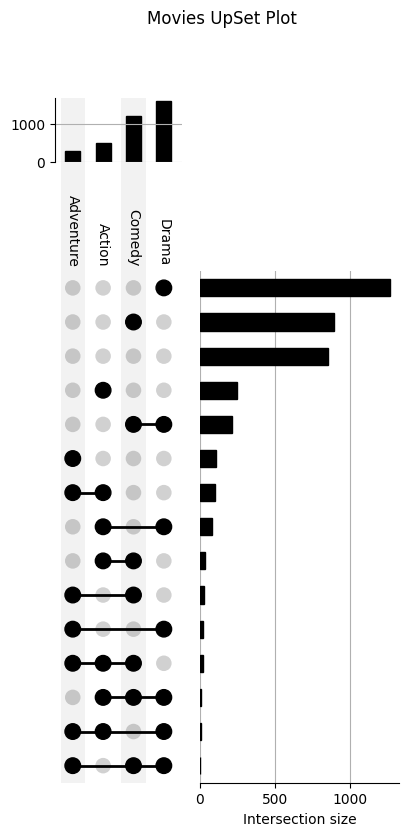

In [4]:
movies_plot.plot()
plt.suptitle("Movies UpSet Plot")

Text(0.5, 0.98, 'UpSet Plot of COVID-19 Symptoms')

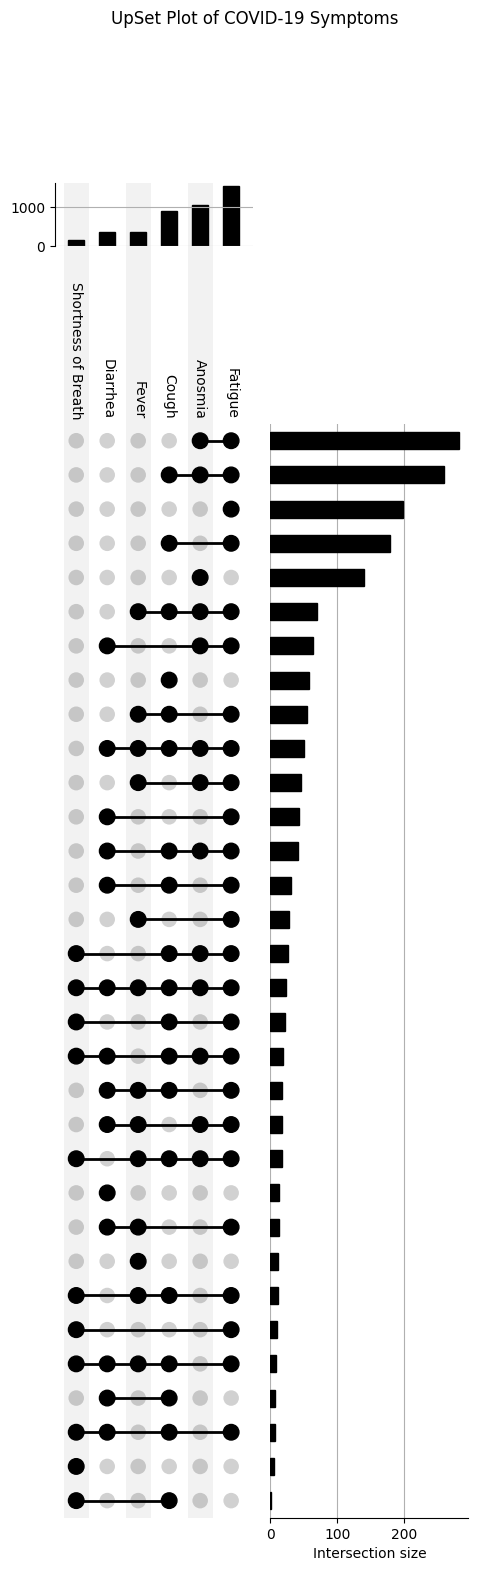

In [5]:
covid_plot.plot()
plt.suptitle("UpSet Plot of COVID-19 Symptoms")

Text(0.5, 0.98, 'World Organization Membership UpSet plots')

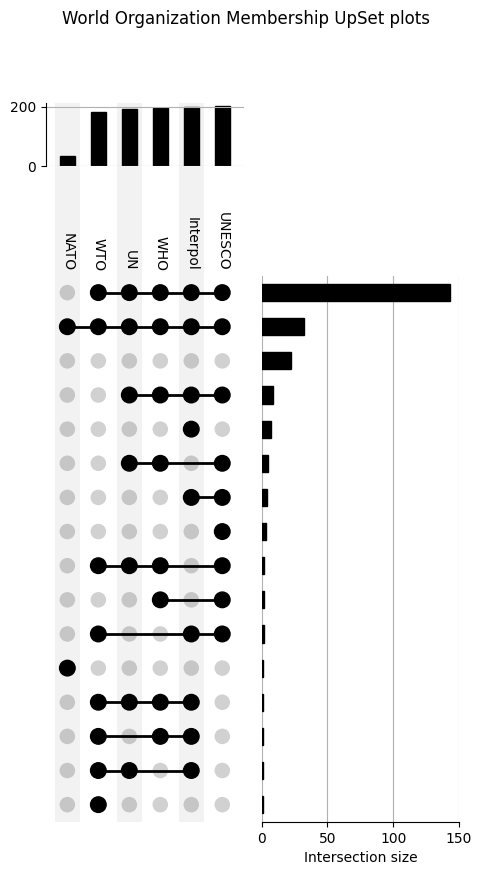

In [6]:
orgs_plot.plot()
plt.suptitle("World Organization Membership UpSet plots")

Text(0.5, 0.98, 'UpSet Plot of Tennis Grand Slam Tournament Winners')

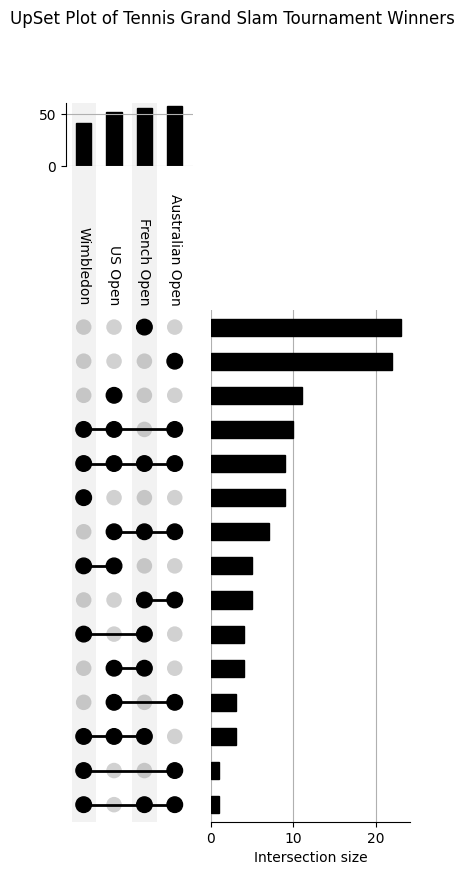

In [7]:
tennis_plot.plot()
plt.suptitle("UpSet Plot of Tennis Grand Slam Tournament Winners")

### Fetch the generated text descriptions

In [9]:
covid_text_description = covid_plot.get_alt_text()

In [10]:
orgs_text_description = orgs_plot.get_alt_text()

In [11]:
tennis_text_description = tennis_plot.get_alt_text()

The text description comes as a JSON format with 3 fields.

 - Technique Description: A brief technique of UpSet Plots
 - Short Description: A summary of the UpSet Plot. This is similar to a caption
 - Long Description: Markdown formatted. In-depth description of many aspects of the plot

___


#### Technique Description:

In [12]:
print(movies_text_description["techniqueDescription"])

This is an UpSet plot that visualizes set intersections. To learn about UpSet plots, visit REDACTED.


In [13]:
print(covid_text_description["techniqueDescription"])

This is an UpSet plot that visualizes set intersections. To learn about UpSet plots, visit REDACTED.


In [14]:
print(orgs_text_description["techniqueDescription"])

This is an UpSet plot that visualizes set intersections. To learn about UpSet plots, visit REDACTED.


In [15]:
print(tennis_text_description["techniqueDescription"])

This is an UpSet plot that visualizes set intersections. To learn about UpSet plots, visit REDACTED.


___

#### Short Description:

In [16]:
print(movies_text_description["shortDescription"])

This is an UpSet plot that shows the intersections of 4 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are just Drama (1264) and just Comedy (894). The largest intersection of at least two sets is between Comedy and Drama, with 215 movies. Other large intersections also involve Action and Comedy. 


In [17]:
print(covid_text_description["shortDescription"])

This is an UpSet plot that shows the intersections of 6 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are Anosmia and Fatigue (281) and Cough, Anosmia, and Fatigue (259). The intersection of all sets is present with 23 elements.


In [18]:
print(orgs_text_description["shortDescription"])

This is an UpSet plot that shows the intersections of 6 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are WTO, UN, WHO, Interpol, and UNESCO (143) and NATO, WTO, UN, WHO, Interpol, and UNESCO (32). The intersection of all sets is the second largest with 32 elements.


In [19]:
print(tennis_text_description["shortDescription"])

This is an UpSet plot that shows the intersections of 4 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are just French Open (23) and just Australian Open (22). The largest intersection of at least two sets is between Wimbledon, US Open, and Australian Open, with 10 elements. Other large intersections also involve US Open and Australian Open. The intersection of all sets is present with 9 elements.


___

#### Long Description:

In [20]:
print(movies_text_description["longDescription"])

# UpSet Introduction
This is an UpSet plot that shows the intersections of 4 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are just Drama (1264) and just Comedy (894). The largest intersection of at least two sets is between Comedy and Drama, with 215 movies. Other large intersections also involve Action and Comedy. 

# Dataset Properties
The dataset contains 4 sets and 3589 elements, of which 4 sets are shown in the plot.

# Set Properties
The set sizes are diverging a lot, ranging from 283 to 1603. The largest set is Drama with 1603 movies, followed by Comedy with 1200, Action with 503, and Adventure with 283.

# Intersection Properties
The plot is sorted by size in ascending order. There are 15 non-empty intersections, all of which are shown in the plot. The largest 5 intersections are just Drama (1264); just Comedy (894); the empty intersection (852); just Action (247); and Comedy and Drama (215).

# Statistical Information
The average intersection s

In [21]:
print(covid_text_description["longDescription"])

# UpSet Introduction
This is an UpSet plot that shows the intersections of 6 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are Anosmia and Fatigue (281) and Cough, Anosmia, and Fatigue (259). The intersection of all sets is present with 23 elements.

# Dataset Properties
The dataset contains 6 sets and 4340 elements, of which 6 sets are shown in the plot.

# Set Properties
The set sizes are diverging a lot, ranging from 148 to 1531. The largest set is Fatigue with 1531 elements, followed by Anosmia with 1051, Cough with 897, Fever with 363, Diarrhea with 350, and Shortness of Breath with 148.

# Intersection Properties
The plot is sorted by size in ascending order. There are 32 non-empty intersections, all of which are shown in the plot. The largest 5 intersections are Anosmia and Fatigue (281); Cough, Anosmia, and Fatigue (259); just Fatigue (198); Cough and Fatigue (179); and just Anosmia (140).

# Statistical Information
The average intersection size 

In [22]:
print(orgs_text_description["longDescription"])

# UpSet Introduction
This is an UpSet plot that shows the intersections of 6 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are WTO, UN, WHO, Interpol, and UNESCO (143) and NATO, WTO, UN, WHO, Interpol, and UNESCO (32). The intersection of all sets is the second largest with 32 elements.

# Dataset Properties
The dataset contains 6 sets and 1006 elements, of which 6 sets are shown in the plot.

# Set Properties
The set sizes are diverging a lot, ranging from 33 to 202. The largest set is UNESCO with 202 elements, followed by Interpol with 200, WHO with 195, UN with 193, WTO with 183, and NATO with 33.

# Intersection Properties
The plot is sorted by size in ascending order. There are 16 non-empty intersections, all of which are shown in the plot. The largest 5 intersections are WTO, UN, WHO, Interpol, and UNESCO (143); NATO, WTO, UN, WHO, Interpol, and UNESCO (32); the empty intersection (22); UN, WHO, Interpol, and UNESCO (9); and just Interpol (7).

# S

In [23]:
print(tennis_text_description["longDescription"])

# UpSet Introduction
This is an UpSet plot that shows the intersections of 4 sets. To learn about UpSet plots, visit REDACTED. The largest 2 intersections are just French Open (23) and just Australian Open (22). The largest intersection of at least two sets is between Wimbledon, US Open, and Australian Open, with 10 elements. Other large intersections also involve US Open and Australian Open. The intersection of all sets is present with 9 elements.

# Dataset Properties
The dataset contains 4 sets and 208 elements, of which 4 sets are shown in the plot.

# Set Properties
The set sizes are moderately diverging, ranging from 42 to 58. The largest set is Australian Open with 58 elements, followed by French Open with 56, US Open with 52, and Wimbledon with 42.

# Intersection Properties
The plot is sorted by size in ascending order. There are 15 non-empty intersections, all of which are shown in the plot. The largest 5 intersections are just French Open (23); just Australian Open (22); jus

*Note*: This version of UpSetPlot is built on a fork and not yet merged into the main repository branch. We will not be sharing this fork for anonimity purposes during review, but we hope it will be merged to main in the future.